<a href="https://colab.research.google.com/github/yaswanth2004-code/CREDIT-CARD-ELIGIBILITY---BOOSTING-MODELS/blob/main/IDP_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.9 MB/s eta 0:00:00


In [ ]:
!pip install "dask[dataframe]"


INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.6/242.6 kB 9.6 MB/s eta 0:00:00


In [ ]:
!pip install category_encoders


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 6.6 MB/s eta 0:00:00


In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score
import warnings
import category_encoders as ce  # Ensure this is installed with 'pip install category_encoders'
import optuna

# Suppress warnings
warnings.filterwarnings('ignore')


In [ ]:
path = '/content/dataset[1].csv'

# Load dataset from Excel file
df = pd.read_csv(path)

# Set option to display all columns
pd.set_option('display.max_columns', None)

#Display the loaded dataset
df


,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,5148694,0,0,0,0,0,0,0,0,2,20,180000.0,56.400884,0.542106,Pensioner,Secondary / secondary special,Civil marriage,Municipal apartment,Laborers,1
9705,5149055,0,0,1,1,1,0,0,0,2,19,112500.0,43.360233,7.375921,Commercial associate,Secondary / secondary special,Married,House / apartment,Other,1
9706,5149729,1,1,1,0,0,0,0,0,2,21,90000.0,52.296762,4.711938,Working,Secondary / secondary special,Married,House / apartment,Other,1
9707,5149838,0,0,1,0,1,1,0,0,2,32,157500.0,33.914454,3.627727,Pensioner,Higher education,Married,House / apartment,Medicine staff,1


In [ ]:
df.select_dtypes('object').columns

Index(['Income_type', 'Education_type', 'Family_status', 'Housing_type',
       'Occupation_type'],
      dtype='object')

In [ ]:
df.select_dtypes('object').columns

Index(['Income_type', 'Education_type', 'Family_status', 'Housing_type',
       'Occupation_type'],
      dtype='object')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score
import warnings
import category_encoders as ce  # Ensure this is installed with 'pip install category_encoders'
import optuna

# Suppress warnings
warnings.filterwarnings('ignore')

path = '/content/dataset[1].csv'

# Load dataset from Excel file
df = pd.read_csv(path)

# Set option to display all columns
pd.set_option('display.max_columns', None)

# Display the loaded dataset
#df

# Assuming you want to create a copy of 'df' for encoding
df_cat = df.copy()  # Create a copy of df and assign it to df_cat

# Now you can use df_cat in your code
numerical_cols = df_cat.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('Target')

# Perform Weight of Evidence Encoding on numerical columns
cat_encoder = ce.WOEEncoder(cols=numerical_cols)
df_cat[numerical_cols] = cat_encoder.fit_transform(df_cat[numerical_cols], df_cat['Target'])

In [ ]:
models = []

xgb_model_def = XGBClassifier()
lgb_model_def = LGBMClassifier()
catboost_model_def = CatBoostClassifier()
catboost_model_custom = CatBoostClassifier(cat_features=['Income_type', 'Education_type', 'Family_status', 'Housing_type',
       'Occupation_type'])

models.extend([
    ('XGBoost', xgb_model_def),
    ('LightGBM', lgb_model_def),
    ('CatBoost', catboost_model_def),
    ('CatBoost_Custom', catboost_model_custom),
])

In [ ]:
def train_and_evaluate_model(model_name, model, X_train, y_train, X_test, y_test):
    """
    Train and evaluate the given model on the training and testing data.

    Parameters:
    model_name (str): Name of the model for display purposes.
    model : Machine learning model object.
    X_train : Features of the training data.
    y_train : Target labels of the training data.
    X_test : Features of the testing data.
    y_test : Target labels of the testing data.

    Returns:
    float, float: Gini coefficients calculated from the model's predictions on training and testing data.
    """

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Predict labels and probabilities on the testing data
    y_test_pred = model.predict(X_test)
    y_test_prob = model.predict_proba(X_test)[:, 1]

    # Predict labels and probabilities on the training data
    y_train_pred = model.predict(X_train)
    y_train_prob = model.predict_proba(X_train)[:, 1]

    # Calculate ROC AUC and Gini coefficient for testing data
    roc_test_prob = roc_auc_score(y_test, y_test_prob)
    gini_test_prob = roc_test_prob * 2 - 1

    # Calculate ROC AUC and Gini coefficient for training data
    roc_train_prob = roc_auc_score(y_train, y_train_prob)
    gini_train_prob = roc_train_prob * 2 - 1

    # Calculate confusion matrix and classification report for testing data
    confusion_matrix_test_result = confusion_matrix(y_test, y_test_pred)
    classification_report_test_result = classification_report(y_test, y_test_pred)

    # Calculate confusion matrix and classification report for training data
    confusion_matrix_train_result = confusion_matrix(y_train, y_train_pred)
    classification_report_train_result = classification_report(y_train, y_train_pred)

    # Print model performance metrics
    print(f'Model Performance for {model_name}')
    print('Gini prob for testing data is', gini_test_prob * 100)
    print('Gini prob for training data is', gini_train_prob * 100)
    print('Classification Report for Testing Data:')
    print(classification_report_test_result)
    print('Confusion Matrix for Testing Data:')
    print(confusion_matrix_test_result)
    print('Classification Report for Training Data:')
    print(classification_report_train_result)
    print('Confusion Matrix for Training Data:')
    print(confusion_matrix_train_result)

    return gini_train_prob, gini_test_prob

In [ ]:
# Initialize the DataFrame to store Gini coefficients
gini_df = pd.DataFrame(columns=['Model', 'Gini_train_prob', 'Gini_test_prob'])

# Iterate through each model in the list of models
for model_name, model in models:
    # Train and evaluate the model, and calculate the Gini coefficient
    if model_name == 'CatBoost_Custom':
        gini_train_prob, gini_test_prob = train_and_evaluate_model(model_name, model, X_train_cat, y_train_cat, X_test_cat, y_test_cat)
    else:
        gini_train_prob, gini_test_prob = train_and_evaluate_model(model_name, model, X_train_boost, y_train_boost, X_test_boost, y_test_boost)

    # Add model name and Gini coefficients to the DataFrame
    gini_df = pd.concat([gini_df, pd.DataFrame({'Model': [model_name], 'Gini_train_prob': [gini_train_prob], 'Gini_test_prob': [gini_test_prob]})], ignore_index=True)

# Sort the DataFrame by Gini coefficient for testing data in descending order
gini_df_sorted = gini_df.sort_values(by='Gini_test_prob', ascending=False)

Model Performance for XGBoost
Gini prob for testing data is 8.551918329616592
Gini prob for training data is 98.74071228018325
Classification Report for Testing Data:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1659
           1       0.32      0.02      0.05       283

    accuracy                           0.85      1942
   macro avg       0.59      0.51      0.48      1942
weighted avg       0.78      0.85      0.79      1942

Confusion Matrix for Testing Data:
[[1644   15]
 [ 276    7]]
Classification Report for Training Data:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      6767
           1       1.00      0.53      0.69      1000

    accuracy                           0.94      7767
   macro avg       0.97      0.77      0.83      7767
weighted avg       0.94      0.94      0.93      7767

Confusion Matrix for Training Data:
[[6767    0]
 [ 470  530]]
[LightGBM] [W

In [ ]:
gini_df_sorted

,Model,Gini_train_prob,Gini_test_prob
2,CatBoost,0.944380,0.808421
1,LightGBM,0.971045,0.795685
0,XGBoost,0.991238,0.777915
3,CatBoost_Custom,0.683843,0.141506


In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score
import pandas as pd

# Initialize the DataFrame to store Gini coefficients and accuracies
gini_df = pd.DataFrame(columns=['Model', 'Gini_train_prob', 'Gini_test_prob', 'Train_Accuracy', 'Test_Accuracy'])

# Function to train and evaluate the model, returning Gini and accuracy
def train_and_evaluate_model(model_name, model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Predict probabilities for Gini calculation
    train_prob = model.predict_proba(X_train)[:, 1]
    test_prob = model.predict_proba(X_test)[:, 1]

    # Calculate Gini coefficients
    gini_train_prob = 2 * roc_auc_score(y_train, train_prob) - 1
    gini_test_prob = 2 * roc_auc_score(y_test, test_prob) - 1

    # Calculate accuracy
    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))

    return gini_train_prob, gini_test_prob, train_acc, test_acc

# Iterate through each model in the list of models
for model_name, model in models:
    # Train and evaluate the model
    if model_name == 'CatBoost_Custom':
        gini_train_prob, gini_test_prob, train_acc, test_acc = train_and_evaluate_model(model_name, model, X_train_cat, y_train_cat, X_test_cat, y_test_cat)
    else:
        gini_train_prob, gini_test_prob, train_acc, test_acc = train_and_evaluate_model(model_name, model, X_train_boost, y_train_boost, X_test_boost, y_test_boost)

    # Add model name, Gini coefficients, and accuracies to the DataFrame
    gini_df = pd.concat([gini_df, pd.DataFrame({
        'Model': [model_name],
        'Gini_train_prob': [gini_train_prob],
        'Gini_test_prob': [gini_test_prob],
        'Train_Accuracy': [train_acc],
        'Test_Accuracy': [test_acc]
    })], ignore_index=True)

# Sort the DataFrame by Gini coefficient for testing data in descending order
gini_df_sorted = gini_df.sort_values(by='Gini_test_prob', ascending=False)

# Display the sorted Gini DataFrame with accuracy values
print(gini_df_sorted)


Streaming output truncated to the last 5000 lines.
17:	learn: 0.5026758	total: 74ms	remaining: 4.04s
18:	learn: 0.4964979	total: 77.9ms	remaining: 4.02s
19:	learn: 0.4905988	total: 81.9ms	remaining: 4.01s
20:	learn: 0.4849894	total: 85.9ms	remaining: 4.01s
21:	learn: 0.4798446	total: 89.8ms	remaining: 3.99s
22:	learn: 0.4746949	total: 93.8ms	remaining: 3.98s
23:	learn: 0.4697544	total: 97.6ms	remaining: 3.97s
24:	learn: 0.4653029	total: 101ms	remaining: 3.95s
25:	learn: 0.4609074	total: 106ms	remaining: 3.98s
26:	learn: 0.4566870	total: 113ms	remaining: 4.07s
27:	learn: 0.4527209	total: 118ms	remaining: 4.11s
28:	learn: 0.4490980	total: 122ms	remaining: 4.1s
29:	learn: 0.4457338	total: 125ms	remaining: 4.05s
30:	learn: 0.4424466	total: 129ms	remaining: 4.03s
31:	learn: 0.4391777	total: 134ms	remaining: 4.04s
32:	learn: 0.4361613	total: 140ms	remaining: 4.09s
33:	learn: 0.4333313	total: 144ms	remaining: 4.08s
34:	learn: 0.4303434	total: 148ms	remaining: 4.08s
35:	learn: 0.4277024	total:

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Convert the necessary columns to 'category' dtype
df_categorical = df.copy()

categorical_columns = ['Income_type', 'Education_type', 'Family_status', 'Housing_type', 'Occupation_type']

# Convert these columns to category type
for col in categorical_columns:
    df_categorical[col] = df_categorical[col].astype('category')

# Splitting the data
X = df_categorical.drop('Target', axis=1)  # Independent features
y = df_categorical['Target']  # Dependent feature

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Defining the XGBoost model and enabling categorical support
xgboost_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', enable_categorical=True)

# Training the model
xgboost_model.fit(X_train, y_train)

# Predictions
y_train_pred = xgboost_model.predict(X_train)
y_test_pred = xgboost_model.predict(X_test)

# Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"XGBoost Train Accuracy: {train_accuracy:.2f}")
print(f"XGBoost Test Accuracy: {test_accuracy:.2f}")


XGBoost Train Accuracy: 0.96
XGBoost Test Accuracy: 0.85


In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Copy the dataset to avoid modifying the original
df_categorical = df.copy()

# Identify the categorical columns
categorical_columns = ['Income_type', 'Education_type', 'Family_status', 'Housing_type', 'Occupation_type']

# Convert categorical columns to 'category' data type
for col in categorical_columns:
    df_categorical[col] = df_categorical[col].astype('category')

# Splitting the data
X = df_categorical.drop('Target', axis=1)  # Independent features
y = df_categorical['Target']  # Dependent feature

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the LightGBM model
lgbm_model = lgb.LGBMClassifier()

# Training the model
lgbm_model.fit(X_train, y_train, categorical_feature=categorical_columns)

# Predictions
y_train_pred = lgbm_model.predict(X_train)
y_test_pred = lgbm_model.predict(X_test)

# Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"LightGBM Train Accuracy: {train_accuracy:.2f}")
print(f"LightGBM Test Accuracy: {test_accuracy:.2f}")


[LightGBM] [Info] Number of positive: 869, number of negative: 5927
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001802 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1010
[LightGBM] [Info] Number of data points in the train set: 6796, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.127869 -> initscore=-1.919930
[LightGBM] [Info] Start training from score -1.919930
LightGBM Train Accuracy: 0.90
LightGBM Test Accuracy: 0.86


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import catboost as cb

# Assuming 'df' is your original DataFrame

# Copy the dataset to avoid modifying the original
df_catboost = df.copy()

# List of categorical columns to encode
categorical_cols = ['Income_type', 'Education_type',
                    'Family_status', 'Housing_type',
                    'Occupation_type']

# Label encoding for categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_catboost[col] = le.fit_transform(df_catboost[col])
    label_encoders[col] = le  # Store the encoder for future reference

# Splitting the data
X = df_catboost.drop('Target', axis=1)  # Independent features
y = df_catboost['Target']  # Dependent feature

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the CatBoost model
catboost_model = cb.CatBoostClassifier(verbose=False)

# Training the model
catboost_model.fit(X_train, y_train)

# Predictions
y_train_pred = catboost_model.predict(X_train)
y_test_pred = catboost_model.predict(X_test)

# Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"CatBoost Train Accuracy: {train_accuracy:.2f}")
print(f"CatBoost Test Accuracy: {test_accuracy:.2f}")


CatBoost Train Accuracy: 0.89
CatBoost Test Accuracy: 0.86


In [ ]:
# Identifying categorical features
cat_features = ['Gender', 'Income_type', 'Education_type', 'Family_status', 'Housing_type', 'Occupation_type']

# Defining the model with custom settings
catboost_model = CatBoostClassifier(silent=True)

# Training the model with cat_features
catboost_model.fit(X_train, y_train, cat_features=cat_features)

# Predictions
y_train_pred = catboost_model.predict(X_train)
y_test_pred = catboost_model.predict(X_test)

# Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"CatBoost (Custom) Train Accuracy: {train_accuracy:.2f}")
print(f"CatBoost (Custom) Test Accuracy: {test_accuracy:.2f}")


CatBoost (Custom) Train Accuracy: 0.88
CatBoost (Custom) Test Accuracy: 0.86


In [ ]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 4.3 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier


In [ ]:
!pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import LabelEncoder
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Load your dataset
path = '/content/dataset[1].csv'
df = pd.read_csv(path)

# Set option to display all columns
pd.set_option('display.max_columns', None)

# Display the loaded dataset
print(df.head())

# Define features and target
X = df.drop('Target', axis=1)
y = df['Target']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Apply Label Encoding to the categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le  # Store the label encoder for future use (if needed)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Get the indices of the categorical columns (after label encoding)
categorical_indices = [X.columns.get_loc(col) for col in categorical_cols]

# Initialize the base models
catboost_model = CatBoostClassifier(cat_features=categorical_indices, silent=True)
lgb_model = LGBMClassifier()

# Define the ensemble model using VotingClassifier with soft voting
ensemble_model = VotingClassifier(
    estimators=[('catboost', catboost_model), ('lightgbm', lgb_model)],
    voting='soft'
)

# Function to train and evaluate models
def train_and_evaluate_model(model_name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)

    # Predict labels and probabilities on the testing data
    y_test_pred = model.predict(X_test)
    y_test_prob = model.predict_proba(X_test)[:, 1]

    # Predict labels and probabilities on the training data
    y_train_pred = model.predict(X_train)
    y_train_prob = model.predict_proba(X_train)[:, 1]

    # Calculate accuracy
    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)

    # Calculate ROC AUC and Gini coefficient for testing data
    roc_test_prob = roc_auc_score(y_test, y_test_prob)
    gini_test_prob = roc_test_prob * 2 - 1

    # Calculate ROC AUC and Gini coefficient for training data
    roc_train_prob = roc_auc_score(y_train, y_train_prob)
    gini_train_prob = roc_train_prob * 2 - 1

    # Print model performance metrics
    print(f'\nModel Performance for {model_name}')
    print(f'Accuracy for testing data: {accuracy_test * 100:.2f}%')
    print(f'Accuracy for training data: {accuracy_train * 100:.2f}%')
    print(f'Gini prob for testing data: {gini_test_prob * 100:.2f}')
    print(f'Gini prob for training data: {gini_train_prob * 100:.2f}')
    print('Classification Report for Testing Data:')
    print(classification_report(y_test, y_test_pred))
    print('Confusion Matrix for Testing Data:')
    print(confusion_matrix(y_test, y_test_pred))

    return gini_train_prob, gini_test_prob, accuracy_train, accuracy_test

# Train and evaluate the ensemble model
gini_train_prob, gini_test_prob, accuracy_train, accuracy_test = train_and_evaluate_model(
    'Ensemble (CatBoost + LightGBM)', ensemble_model, X_train, y_train, X_test, y_test
)


        ID  Gender  Own_car  Own_property  Work_phone  Phone  Email  \
0  5008804       1        1             1           1      0      0   
1  5008806       1        1             1           0      0      0   
2  5008808       0        0             1           0      1      1   
3  5008812       0        0             1           0      0      0   
4  5008815       1        1             1           1      1      1   

   Unemployed  Num_children  Num_family  Account_length  Total_income  \
0           0             0           2              15      427500.0   
1           0             0           2              29      112500.0   
2           0             0           1               4      270000.0   
3           1             0           1              20      283500.0   
4           0             0           2               5      270000.0   

         Age  Years_employed           Income_type  \
0  32.868574       12.435574               Working   
1  58.793815        3.1047

ADA BOOST

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report


# Load your dataset  (Add this line to define df)
path = '/content/dataset[1].csv'  # Replace with the correct path
df = pd.read_csv(path)

# Assuming 'df' is the DataFrame loaded in the previous cell
data = df.copy()  # Create a copy of df and assign it to data

# Encoding categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Own_car'] = label_encoder.fit_transform(data['Own_car'])
data['Own_property'] = label_encoder.fit_transform(data['Own_property'])
data['Work_phone'] = label_encoder.fit_transform(data['Work_phone'])
data['Phone'] = label_encoder.fit_transform(data['Phone'])
data['Email'] = label_encoder.fit_transform(data['Email'])
data['Unemployed'] = label_encoder.fit_transform(data['Unemployed'])
data['Income_type'] = label_encoder.fit_transform(data['Income_type'])
data['Education_type'] = label_encoder.fit_transform(data['Education_type'])
data['Family_status'] = label_encoder.fit_transform(data['Family_status'])
data['Housing_type'] = label_encoder.fit_transform(data['Housing_type'])
data['Occupation_type'] = label_encoder.fit_transform(data['Occupation_type'])

# Splitting the data into features and target
X = data.drop(columns=['ID', 'Target'])  # Dropping ID and Target
y = data['Target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize AdaBoost classifier
ada_clf = AdaBoostClassifier(n_estimators=100, random_state=42)

# Train the model
ada_clf.fit(X_train, y_train)

# Make predictions
y_pred = ada_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.853244078269825
Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1659
           1       0.00      0.00      0.00       283

    accuracy                           0.85      1942
   macro avg       0.43      0.50      0.46      1942
weighted avg       0.73      0.85      0.79      1942



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from sklearn.ensemble import AdaBoostClassifier

# Load your dataset (Replace with the correct path)
path = '/content/dataset[1].csv'  # Adjust this path
df = pd.read_csv(path)

# Copy the dataset to avoid modifying the original
data = df.copy()

# Encoding categorical variables
categorical_columns = ['Income_type', 'Education_type', 'Family_status',
                       'Housing_type', 'Occupation_type']

# Label encoding for categorical columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Splitting the data into features and target
X = data.drop(columns=['ID', 'Target'])  # Dropping ID and Target
y = data['Target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize a dictionary to store accuracies
accuracies = {}

# XGBoost
xgboost_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', enable_categorical=True)
xgboost_model.fit(X_train, y_train)
y_train_pred = xgboost_model.predict(X_train)
y_test_pred = xgboost_model.predict(X_test)
accuracies['XGBoost'] = {
    'Train Accuracy': accuracy_score(y_train, y_train_pred),
    'Test Accuracy': accuracy_score(y_test, y_test_pred)
}

# LightGBM
lgbm_model = lgb.LGBMClassifier()
lgbm_model.fit(X_train, y_train)
y_train_pred = lgbm_model.predict(X_train)
y_test_pred = lgbm_model.predict(X_test)
accuracies['LightGBM'] = {
    'Train Accuracy': accuracy_score(y_train, y_train_pred),
    'Test Accuracy': accuracy_score(y_test, y_test_pred)
}

# CatBoost
catboost_model = cb.CatBoostClassifier(verbose=False)
catboost_model.fit(X_train, y_train)
y_train_pred = catboost_model.predict(X_train)
y_test_pred = catboost_model.predict(X_test)
accuracies['CatBoost'] = {
    'Train Accuracy': accuracy_score(y_train, y_train_pred),
    'Test Accuracy': accuracy_score(y_test, y_test_pred)
}

# AdaBoost
ada_clf = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_clf.fit(X_train, y_train)
y_train_pred = ada_clf.predict(X_train)
y_test_pred = ada_clf.predict(X_test)
accuracies['AdaBoost'] = {
    'Train Accuracy': accuracy_score(y_train, y_train_pred),
    'Test Accuracy': accuracy_score(y_test, y_test_pred)
}

# Convert the accuracies dictionary to a DataFrame for better visualization
accuracies_df = pd.DataFrame(accuracies).T
print(accuracies_df)

# Optionally print classification reports for each model
for model_name, acc in accuracies.items():
    print(f"\n{model_name} Classification Report (Test Set):")
    if model_name == 'AdaBoost':
        print(classification_report(y_test, y_test_pred))


[LightGBM] [Info] Number of positive: 869, number of negative: 5927
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001914 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 753
[LightGBM] [Info] Number of data points in the train set: 6796, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.127869 -> initscore=-1.919930
[LightGBM] [Info] Start training from score -1.919930
          Train Accuracy  Test Accuracy
XGBoost         0.939523       0.855819
LightGBM        0.891701       0.857535
CatBoost        0.886992       0.858565
AdaBoost        0.872425       0.856162

XGBoost Classification Report (Test Set):

LightGBM Classification Report (Test Set):

CatBoost Classification Report (Test Set):

AdaBoost Classification Report (Test Set):
              precision    recall  f1-score   support

           0     

[LightGBM] [Info] Number of positive: 869, number of negative: 5927
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001777 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 753
[LightGBM] [Info] Number of data points in the train set: 6796, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.127869 -> initscore=-1.919930
[LightGBM] [Info] Start training from score -1.919930
          Train Accuracy  Test Accuracy
XGBoost         0.939523       0.855819
LightGBM        0.891701       0.857535
CatBoost        0.886992       0.858565
AdaBoost        0.872425       0.856162


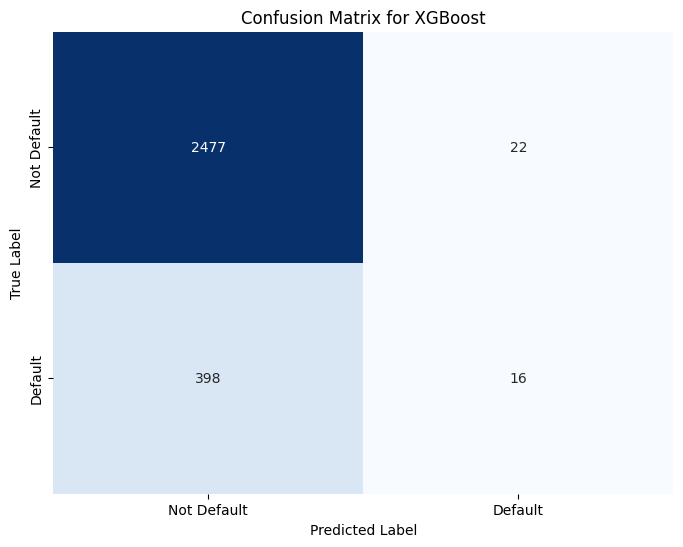

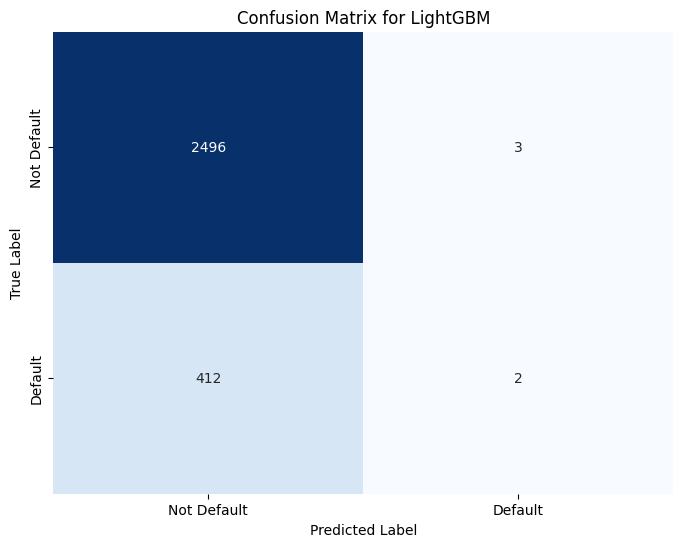

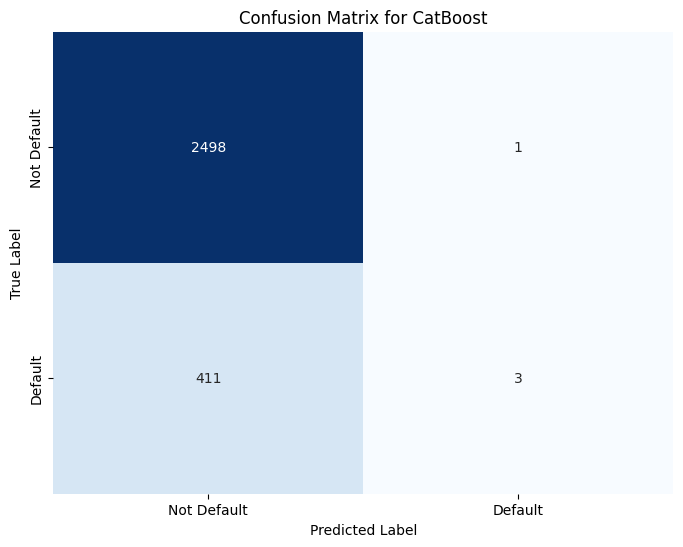

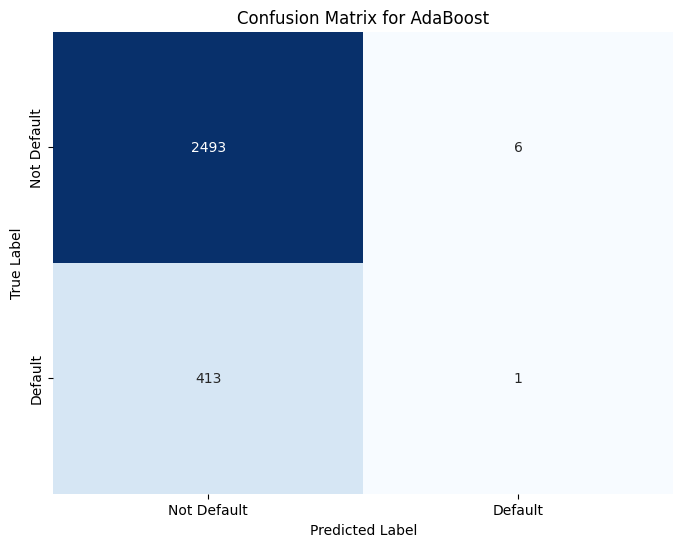


XGBoost Classification Report (Test Set):

LightGBM Classification Report (Test Set):

CatBoost Classification Report (Test Set):

AdaBoost Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2499
           1       0.14      0.00      0.00       414

    accuracy                           0.86      2913
   macro avg       0.50      0.50      0.46      2913
weighted avg       0.76      0.86      0.79      2913



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (Replace with the correct path)
path = '/content/dataset[1].csv'  # Adjust this path
df = pd.read_csv(path)

# Copy the dataset to avoid modifying the original
data = df.copy()

# Encoding categorical variables
categorical_columns = ['Income_type', 'Education_type', 'Family_status',
                       'Housing_type', 'Occupation_type']

# Label encoding for categorical columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Splitting the data into features and target
X = data.drop(columns=['ID', 'Target'])  # Dropping ID and Target
y = data['Target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize a dictionary to store accuracies and predictions
accuracies = {}
predictions = {}

# XGBoost
xgboost_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', enable_categorical=True)
xgboost_model.fit(X_train, y_train)
y_train_pred = xgboost_model.predict(X_train)
y_test_pred = xgboost_model.predict(X_test)
accuracies['XGBoost'] = {
    'Train Accuracy': accuracy_score(y_train, y_train_pred),
    'Test Accuracy': accuracy_score(y_test, y_test_pred)
}
predictions['XGBoost'] = y_test_pred

# LightGBM
lgbm_model = lgb.LGBMClassifier()
lgbm_model.fit(X_train, y_train)
y_train_pred = lgbm_model.predict(X_train)
y_test_pred = lgbm_model.predict(X_test)
accuracies['LightGBM'] = {
    'Train Accuracy': accuracy_score(y_train, y_train_pred),
    'Test Accuracy': accuracy_score(y_test, y_test_pred)
}
predictions['LightGBM'] = y_test_pred

# CatBoost
catboost_model = cb.CatBoostClassifier(verbose=False)
catboost_model.fit(X_train, y_train)
y_train_pred = catboost_model.predict(X_train)
y_test_pred = catboost_model.predict(X_test)
accuracies['CatBoost'] = {
    'Train Accuracy': accuracy_score(y_train, y_train_pred),
    'Test Accuracy': accuracy_score(y_test, y_test_pred)
}
predictions['CatBoost'] = y_test_pred

# AdaBoost
ada_clf = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_clf.fit(X_train, y_train)
y_train_pred = ada_clf.predict(X_train)
y_test_pred = ada_clf.predict(X_test)
accuracies['AdaBoost'] = {
    'Train Accuracy': accuracy_score(y_train, y_train_pred),
    'Test Accuracy': accuracy_score(y_test, y_test_pred)
}
predictions['AdaBoost'] = y_test_pred

# Convert the accuracies dictionary to a DataFrame for better visualization
accuracies_df = pd.DataFrame(accuracies).T
print(accuracies_df)

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Not Default', 'Default'],
                yticklabels=['Not Default', 'Default'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Plot confusion matrices for each model
for model_name, preds in predictions.items():
    plot_confusion_matrix(y_test, preds, model_name)

# Optionally print classification reports for each model
for model_name, acc in accuracies.items():
    print(f"\n{model_name} Classification Report (Test Set):")
    if model_name == 'AdaBoost':
        print(classification_report(y_test, predictions[model_name]))
